<a href="https://colab.research.google.com/github/AgusDelga2/V1_regresion_lineal/blob/main/Diabetes/V1_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

En el siguiente código cree un modelo de regresión lineal para un dataset de Diabetes. El dataset está formado por 10 variables predictivas: 'age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'. Predeciremos el progreso de la enfermedad luego de un año del primer registro.

## Importación de librerías


In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings 
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Dataset
Utilicé un dataset de pacientes con diabetes, provisto por sklearn.datasets.
Las características de las variables son las siguientes: 


*   age: edad en años
*   sex: sexo del paciente
*   bmi: índice de masa corporal
*   bp: presión arterial promedio
* s1 tc, tc, colesterol sérico total
* s2 ldl, lipoproteínas de baja densidad
* s3 hdl, lipoproteínas de alta densidad
* s4 tch, colesterol total / HDL
* s5 ltg, posiblemente logaritmo del nivel de triglicéridos séricos
* s6 glu, nivel de azúcar en la sangre

La columna 11 es la variable objetivo
* target,  es una medida cuantitativa de la progresión de la enfermedad un año después del inicio


In [ ]:
# Importación de datos
# ===========================================================================
from sklearn.datasets import load_diabetes

#Cargamos los datos 
datos = load_diabetes()
print("Features: ", datos.feature_names)
print("Description: ", datos.DESCR)

# Creamos el pandas df
# Necesitamos concatenar la columna target con los features
df = pd.DataFrame(data= np.c_[datos['target'], datos['data']],
                     columns= ['target'] + datos['feature_names'])


Features:  ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Description:  .. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log o

# Análisis exploratorio de datos

Una característica del dataset es que todas las variables contienen valores numéricos.

In [ ]:
print(df.head())

   target       age       sex       bmi        bp        s1        s2  \
0   151.0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821   
1    75.0 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163   
2   141.0  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194   
3   206.0 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991   
4   135.0  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596   

         s3        s4        s5        s6  
0 -0.043401 -0.002592  0.019908 -0.017646  
1  0.074412 -0.039493 -0.068330 -0.092204  
2 -0.032356 -0.002592  0.002864 -0.025930  
3 -0.036038  0.034309  0.022692 -0.009362  
4  0.008142 -0.002592 -0.031991 -0.046641  


## Relación entre variables


Al tener 10 variables en el dataset, se debe establecer un modelo lineal múltiple y estudiar la relación que existe entre variables. Esta información me servirá para detectar colinealidad entre predictores.


In [ ]:
#Observamos las correlaciones
print(df.corr())
correlation = df.corr()

#Observamos las correalciones con target en orden descendente
print("Correlación de todas las variables con 'target': \n", correlation['target'].sort_values(ascending=False))

          target       age       sex       bmi        bp        s1        s2  \
target  1.000000  0.187889  0.043062  0.586450  0.441484  0.212022  0.174054   
age     0.187889  1.000000  0.173737  0.185085  0.335427  0.260061  0.219243   
sex     0.043062  0.173737  1.000000  0.088161  0.241013  0.035277  0.142637   
bmi     0.586450  0.185085  0.088161  1.000000  0.395415  0.249777  0.261170   
bp      0.441484  0.335427  0.241013  0.395415  1.000000  0.242470  0.185558   
s1      0.212022  0.260061  0.035277  0.249777  0.242470  1.000000  0.896663   
s2      0.174054  0.219243  0.142637  0.261170  0.185558  0.896663  1.000000   
s3     -0.394789 -0.075181 -0.379090 -0.366811 -0.178761  0.051519 -0.196455   
s4      0.430453  0.203841  0.332115  0.413807  0.257653  0.542207  0.659817   
s5      0.565883  0.270777  0.149918  0.446159  0.393478  0.515501  0.318353   
s6      0.382483  0.301731  0.208133  0.388680  0.390429  0.325717  0.290600   

              s3        s4        s5   

In [ ]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(15)

,variable_1,variable_2,r,abs_r
61,s1,s2,0.896663,0.896663
71,s2,s1,0.896663,0.896663
85,s3,s4,-0.738493,0.738493
95,s4,s3,-0.738493,0.738493
94,s4,s2,0.659817,0.659817
74,s2,s4,0.659817,0.659817
107,s5,s4,0.617857,0.617857
97,s4,s5,0.617857,0.617857
3,target,bmi,0.586450,0.586450
33,bmi,target,0.586450,0.586450


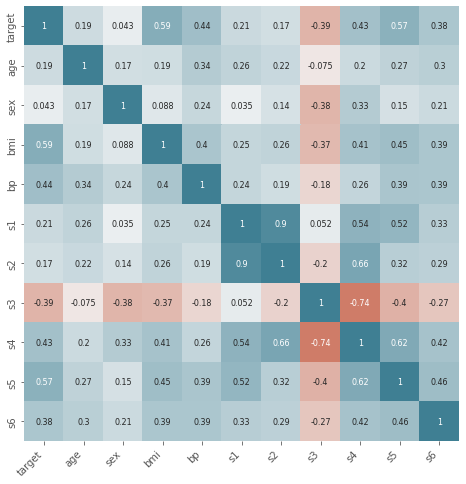

In [ ]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

Podemos observar que las variables que tienen valores de correlación más altos son s1,s2:	0.896663	y s3, s4:	-0.738493

Y con la columna target, las variables que tienen valores de correlación más altos son bmi: 0.586450 y s5: 0.565883

### Distribución de datos por cada variable numérica

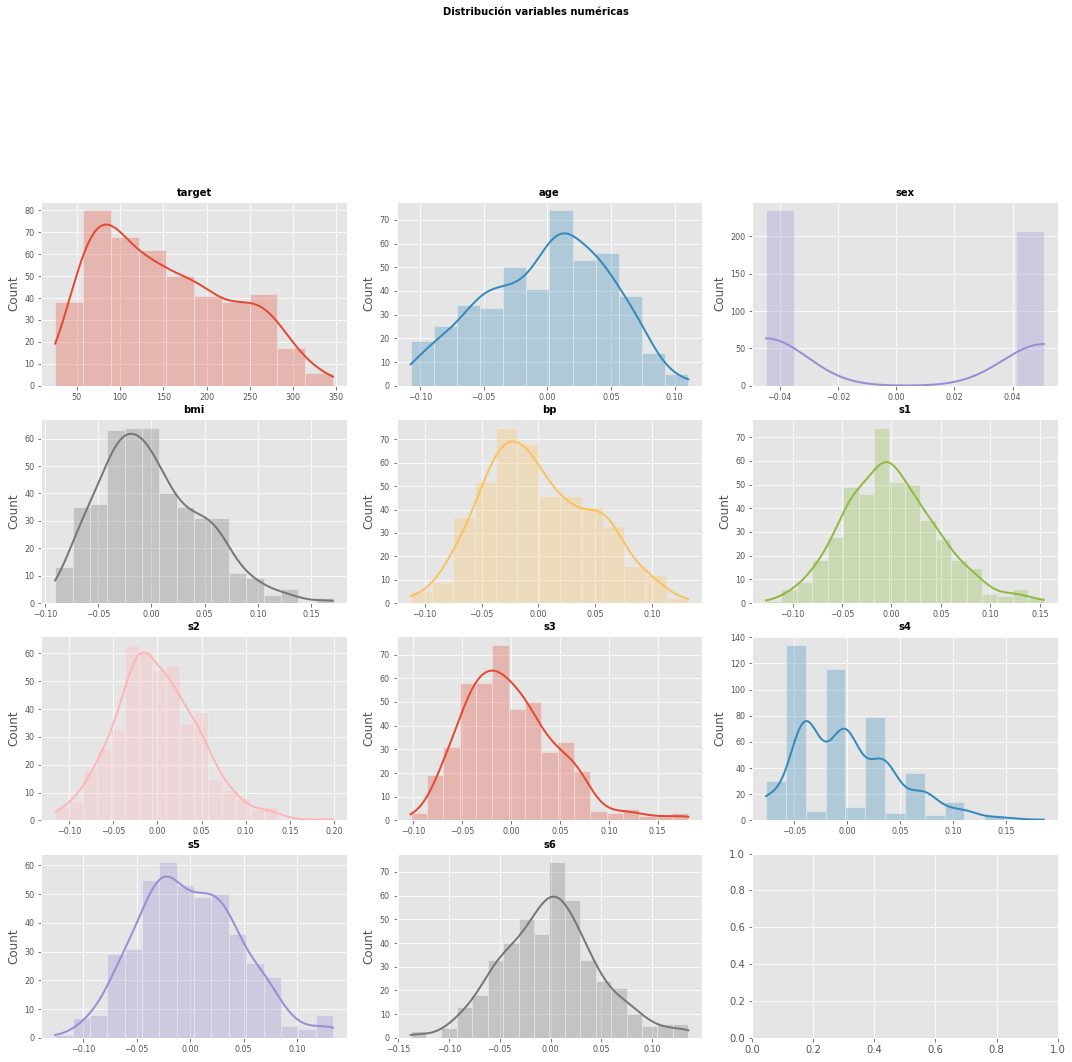

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.8)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

La mayoría de las variables están sesgadas y pocas con una distribución normal, sin tener en cuenta la variable binaria sex. Tantos sesgos pueden presentar un problema al momento de implemetar el modelo.

# Modelos

Ejecuté el modelo de regresión lineal con la regularización Ridge utilizando sklearn. 

Luego implementé otro modelo de regresión lineal con la librería statsmodel, que me brinda más información con el método modelo.summary()

El primer paso es la división de datos, utilizando el %70 del dataset para entrenamiento y %30 para evaluación del modelo. 

## División en train y test

In [ ]:
# División de los datos en train y test
# ==============================================================================
x = df.drop(columns = 'target')
y = pd.DataFrame(datos.target)

X_train, X_test, y_train, y_test = train_test_split(
                                        x,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Implementación del modelo Ridge con sklearn

---



In [ ]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto RidgeCV utiliza el mean squared error
modelo_ridge = RidgeCV(
            alphas          = np.logspace(-10, 2, 200),
            fit_intercept   = True,
            normalize       = True,
            store_cv_values = True
         )

_ = modelo_ridge.fit(X = X_train, y = y_train)

# Información del modelo
# ==============================================================================
print("Intercept:", modelo_ridge.intercept_)
print("Coeficiente:", list(zip(x.columns, modelo_ridge.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo_ridge.score(x, y))

Intercept: [152.384916]
Coeficiente: [('age', -16.257703154139346), ('sex', -254.33391181551667), ('bmi', 500.24703191776825), ('bp', 296.1866082930672), ('s1', -72.32838246905561), ('s2', -76.90865793338989), ('s3', -189.25462070493356), ('s4', 118.93222382016285), ('s5', 478.17648583214657), ('s6', 89.58470181422497)]
Coeficiente de determinación R^2: 0.5132601657217792


Con el modelo Ridge buscamos que los coeficientes de correlación del modelo tiendan a cero, minimizando así el riesgo de overfitting, reduciendo varianza, atenuado el efecto de la correlación entre predictores y reduciendo la influencia en el modelo de los predictores menos relevantes. Cuando se utiliza regularización, es útil evaluar cómo se aproximan a cero los coeficientes a medida que se incrementa el valor de alpha así como la evolución del error de validación cruzada en función del alpha empleado.

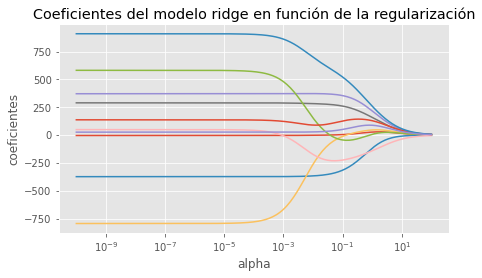

In [ ]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelo_ridge.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo ridge en función de la regularización');
plt.axis('tight')
plt.show()

Puede verse en un principio los coeficientes se mantienen, pero a medida que aumenta el valor de alpha la regularización es mayor y el valor de los coeficientes se reduce.

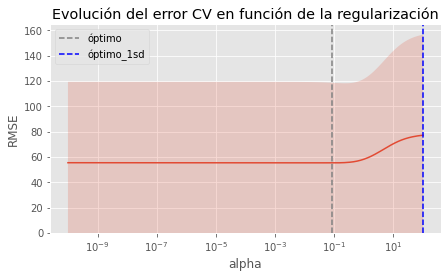

In [ ]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.cv_values almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_samples, n_targets, n_alphas)
mse_cv = modelo_ridge.cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = modelo_ridge.cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo_ridge.alphas[np.argmin(rmse_cv)]
optimo_1sd   = modelo_ridge.alphas[rmse_cv == min_rsme_1sd]


# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo_ridge.alphas, rmse_cv)
ax.fill_between(
    modelo_ridge.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [ ]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo_ridge.alpha_}")

Mejor valor de alpha encontrado: 0.08406652885618317


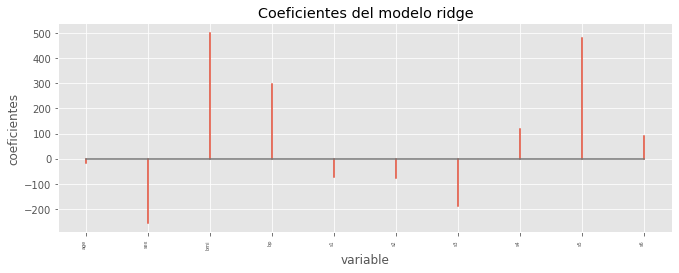

In [ ]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo_ridge.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo ridge');

In [ ]:
# Predicciones test
# ==============================================================================
predicciones = modelo_ridge.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:10]

array([185.73480231, 178.64231806,  93.04322286,  75.39023899,
       103.44666998, 186.80424086, 155.35648889, 124.94077443,
       110.60331936, 149.72646062])

In [ ]:
# Error de test del modelo 
# ==============================================================================
rmse_ridge = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_ridge}. Las predicciones del modelo final se alejan en promedio {rmse_ridge} unidades del valor real.")



El error (rmse) de test es: 53.473908339878925. Las predicciones del modelo final se alejan en promedio 53.473908339878925 unidades del valor real.


# Implementación del modelo con statsmodel


In [ ]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo_sm = sm.OLS(endog=y_train, exog=X_train,)
modelo_sm = modelo_sm.fit()
print(modelo_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     33.24
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           5.68e-43
Time:                        19:34:46   Log-Likelihood:                -1668.9
No. Observations:                 309   AIC:                             3360.
Df Residuals:                     298   BIC:                             3401.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.3803      3.111     48.976      0.0

Podemos observar que el R-squared (correlación**2) es de 0.527. Por lo que es el mejor coeficiente de correlación que puedo encontrar entre los predictores y la variable objetivo. Por lo que el %48 de los datos no están pudiendo ser explicado por la regresión.

En la columna 't' podemos observar la prueba de hipotesis nula, junto a sus p-value en la columna 'P>|t|'. Todos los valores que estén por debajo de 0.05 rehazan la hipótesis nula en favor de la alternativa. 

Al tener valores mayores a 0.05 nos demuestran que hay correlación y son variables que pueden no favorecer al resultado del modelo.

Acorde al p-value obtenido para el coeficiente parcial de regresión de age (0.725), s1 (0.182), s2 (0.225), s3 (0.793), s4 (0.381) y s6 (0.343), no contribuyen de forma significativa al modelo. Se entrenar'a de nuevo el modelo, pero esta vez excluyendo dichos predictores

## Nuevo modelo excluyendo predictores no significativos

In [ ]:
# Creación del modelo utilizando matrices
# ==============================================================================
# Se elimina las variables age, s1, s2, s3, s4 y s6 del conjunto de train y test
X_train = X_train.drop(columns = ['age', 's1', 's2', 's3', 's4', 's6'])
X_test  = X_test.drop(columns = ['age', 's1', 's2', 's3', 's4', 's6'])

# A la matriz de predictores se le tiene que añadir una columna de 1s para el
# intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo_sm  = sm.OLS(endog=y_train, exog=X_train,)
modelo_sm  = modelo_sm.fit()
print(modelo_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     75.11
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           3.28e-44
Time:                        19:34:46   Log-Likelihood:                -1678.4
No. Observations:                 309   AIC:                             3367.
Df Residuals:                     304   BIC:                             3386.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.3443      3.176     47.963      0.0

Como resultado, luego de eliminar las columnas con un p-value alto, el modelo no mejoró, incluso su valor de R-squared bajó. Siendo antes 0.527, ahora tiene un valor de 0.497

In [ ]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo_sm.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,146.094075,158.594574
sex,-325.457649,-55.004165
bmi,445.409501,758.359451
bp,155.806417,452.763008
s5,433.312120,742.366527


In [ ]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = y_train.flatten()
prediccion_train = modelo_sm.predict(exog = X_train)
residuos_train   = prediccion_train - y_train


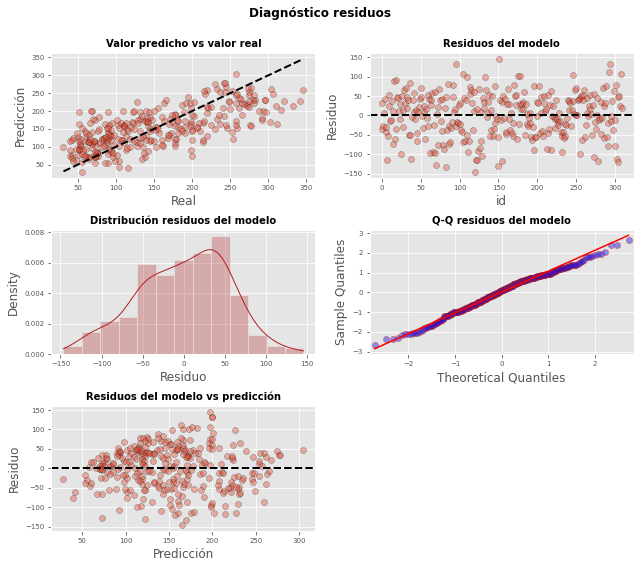

In [ ]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

Observamos que la distribución de los residuos del modelo tienen un pequeño sesgo

# Conclusiones

Por el momento, el modelo no funciona con el set de datos de diabetes. Pudimos ver que en un principio, alimentandolo con todas las variables el R-squared tuvo un valor de 0.527, dejando un %48 de los datos sin explicarse. 

Al crear un nuevo modelo excluyendo predictores no significativos con p-value mayor a 0.05, se esperaba un mejora en el modelo. Pero por el contrario, el R-squared se vió disminuído con un resultado de 0.497. 

Tras estas pruebas, podemos concluír que el modelo utilizado no funciona con el dataset utilizado. Aún es posible continuar haciendo pruebas iterando a traves de todas las variables y evaluando su linealidad con la posibilidad de mejoras en el resultado. También es posible probar el modelo utilizando otro dataset. 
Por el momento decido concluír este proyecto en esta etapa para continuar con otros examenes, cuando pruebe el modelo con otro set de datos lo estaré actualizando en un nuevo directorio de github. 

## Bibliografía

El material teórico utilizado en este proyecto estuvo basado principalmente en los siguientes documentos:

* Machine learning con Python y Scikit-learn by Joaquín Amat Rodrigo, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/documentos/py06_machine_learning_python_scikitlearn.html

* Regresión lineal con Python by Joaquín Amat Rodrigo, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html

* Regularización Ridge, Lasso y Elastic Net con Python by Joaquín Amat Rodrigo, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/documentos/py14-ridge-lasso-elastic-net-python.html

